In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [ ]:
# Loading
df = pd.read_csv("spotify_history.csv")
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [5]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


,ms_played
count,1.498600e+05
mean,1.283166e+05
std,1.178401e+05
min,0.000000e+00
25%,2.795000e+03
50%,1.388400e+05
75%,2.185070e+05
max,1.561125e+06


In [6]:

df.isnull().sum()


spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [7]:

print("Columns:", df.columns.tolist())
for col in df.columns:
    print(f"Unique values in {col[:20]}: {df[col].nunique()}")


Columns: ['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name', 'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle', 'skipped']
Unique values in spotify_track_uri: 16527
Unique values in ts: 140422
Unique values in platform: 6
Unique values in ms_played: 43082
Unique values in track_name: 13839
Unique values in artist_name: 4113
Unique values in album_name: 7948
Unique values in reason_start: 13
Unique values in reason_end: 15
Unique values in shuffle: 2
Unique values in skipped: 2


In [11]:
print(df.columns.tolist())


['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name', 'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle', 'skipped']


In [ ]:
df['minutes_played'] = df['ms_played'] / 60000


/tmp/ipykernel_3236/3955273775.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_duration.values, y=top_duration.index, palette='coolwarm')


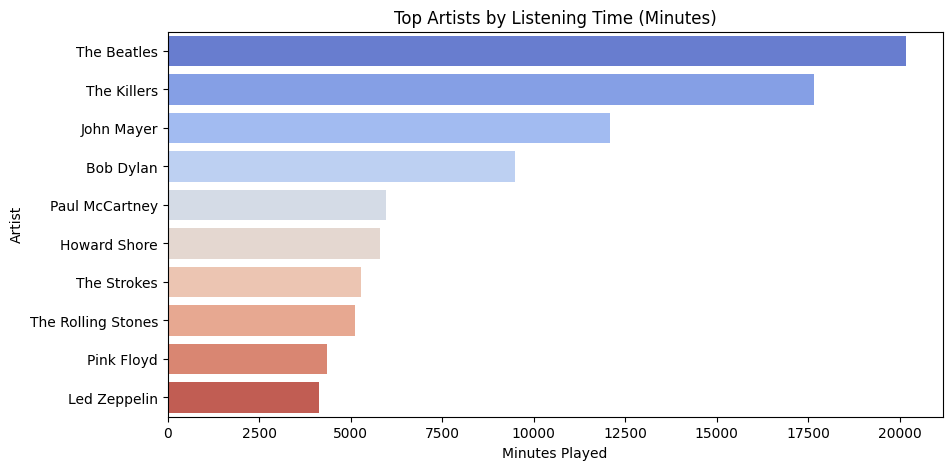

In [ ]:
top_duration = df.groupby('artist_name')['minutes_played'].sum().sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=top_duration.values, y=top_duration.index, palette='coolwarm')
plt.title("Top Artists by Listening Time (Minutes)")
plt.xlabel("Minutes Played")
plt.ylabel("Artist")
plt.show()


In [ ]:
df['minutes_played'] = df['ms_played'] / 60000
total_hours = df['minutes_played'].sum() / 60
print(f"🎧 Total Listening Time: {total_hours:.2f} hours")

🎧 Total Listening Time: 5341.54 hours


In [20]:
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')


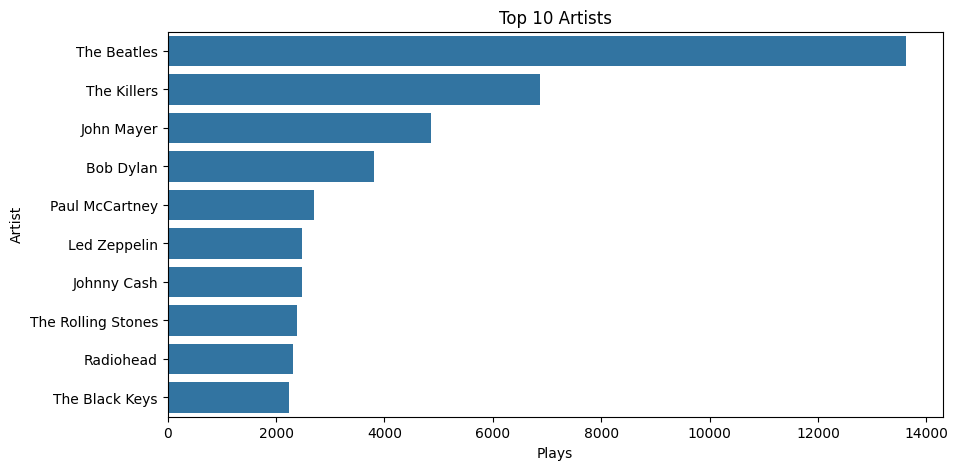

In [26]:
top_artists = df['artist_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title("Top 10 Artists")
plt.xlabel("Plays")
plt.ylabel("Artist")
plt.show()

In [21]:
df['day'] = df['ts'].dt.day_name()


/tmp/ipykernel_3236/566554914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=df, order=order, palette='magma')


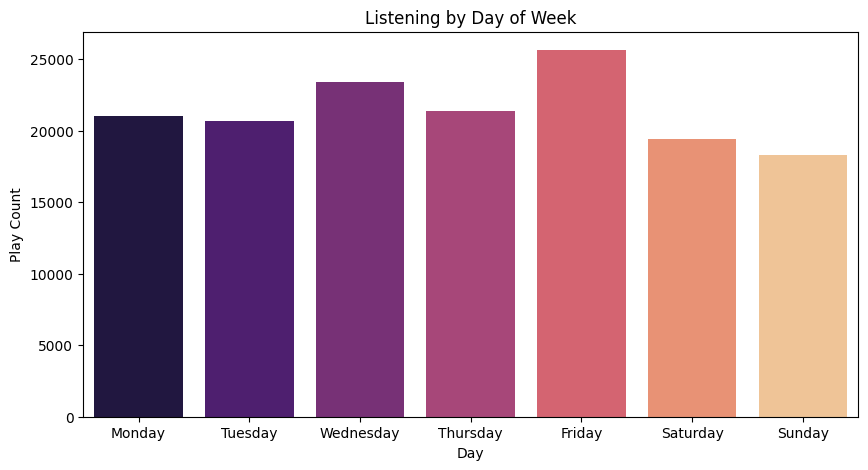

In [ ]:
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')

df['day'] = df['ts'].dt.day_name()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='day', data=df, order=order, palette='magma')
plt.title("Listening by Day of Week")
plt.xlabel("Day")
plt.ylabel("Play Count")
plt.show()


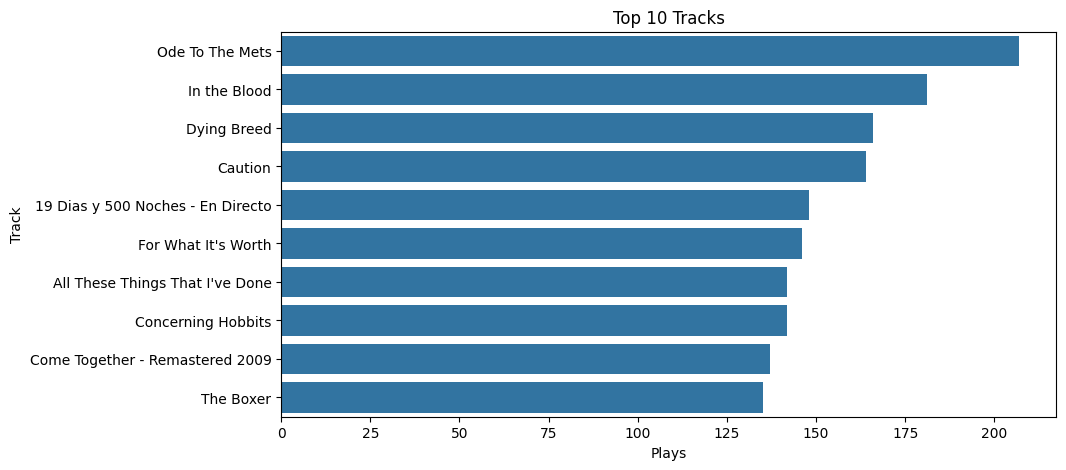

In [24]:
#  Top 10 Tracks
top_tracks = df['track_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_tracks.values, y=top_tracks.index)
plt.title("Top 10 Tracks")
plt.xlabel("Plays")
plt.ylabel("Track")
plt.show()

In [ ]:

df['ts'] = pd.to_datetime(df['ts'])
df['hour'] = df['ts'].dt.hour
df['day'] = df['ts'].dt.day_name()
df['month'] = df['ts'].dt.month_name()